<a href="https://colab.research.google.com/github/amirda9/dataMiningNotebooks/blob/master/Hop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
 
class HOP:
  def __init__(self,x):
    self.x=x
    self.eye = np.eye(x.shape[0])
    self.w = self.x.dot(self.x.T) - (self.x.shape[1]*self.eye)
    # self.a_n = np.sign(self.w.dot(self.a_p))
    # self.a_p = self.update(self.a_p,self.a_n)
    # self.w=self.a_p.dot(self.a_p.T) - (self.x.shape[1]*self.eye)
    self.Async=1
  def update(self,prev,next):
    if self.Async==1:
      var = prev
      for i in range(next.shape[0]):
        if next[i] != prev[i]:
          var[i] = next[i]
          break
    if self.Async ==0 :
      var = next
    return var
 
  def predict(self,x):
    self.a_p = x
    for _ in range(5000):
      self.a_n = np.sign(self.w.dot(self.a_p))
      if np.all(self.a_n == self.a_p):
        print("It took " +str(_) + " Iterations !")
        break
      self.a_p = self.update(self.a_p,self.a_n)
    return self.a_n
  #   for i in range(self.x.shape[0]):
  #     for j in range(self.x.shape[1])
  # def sign(self,z):
  #   if z>0 :
  #     return 1
  #   elif z<0 :
  #     return -1
    # self.w = np.subtract((self.x.dot(self.x.T)),(self.x.shape[0]*eye))
 
class myImg:
  def __init__(self,x):
    img = Image.open(x).convert('L')
    self.img = img.resize((100, 100))
    # return self.img
    # print(img.size)
  def get(self):
    a = np.asarray(self.img)
    self.result = np.ones(a.shape)
    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        if a[i,j]<127 :
          self.result[i,j] = -1
        else :
          self.result[i,j] = 1 
    self.img_binary = self.result
    self.show()
    self.result = np.reshape(self.result,(a.shape[0]*a.shape[1],1))
    return self.result
  def show(self):
    plt.figure()
    plt.imshow(self.img_binary,cmap='gray')
    # plt.figure()
    # self.img.show()
 
class noise:
  # def __init__(self,x,percent):
    
  def __new__(self,x,percent):
    self.var = x 
    self.p = 0.01*percent*x.shape[0]
    cnt = 0 
    res = np.zeros(self.var.shape)
    res = self.var
    for _ in range(int(self.p)):
      i = random.randint(0,self.var.shape[0]-1)
      if self.var[i] == 1 :
        res[i] = -1
      elif self.var[i] == -1 :
        res[i] = 1
    return res
 
def show_hop(z):
    var=np.ones(z.shape)
    for i in range(z.shape[0]):
      if z[i] == -1:
        var[i] = 0
      elif z[i] == 1:
        var[i] = 1
    var = np.reshape(var,(100,100))
    # print(var)
    plt.figure()
    plt.imshow(var)

In [311]:
# zero = np.array([[0,1,1,1,0],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[0,1,1,1,0]]).reshape(-1,1)
# one = np.array([[0,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,1,1,1,0]]).reshape(-1,1)
# two = np.array([[1,1,1,1,1],[0,0,0,0,1],[0,0,0,0,1],[0,0,0,0,1],[0,0,0,0,1],[1,1,1,1,1],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,1,1,1,1]]).reshape(-1,1)
# # plt.imshow(two)
# Myarray = np.concatenate((zero,one,two),axis=1)
# print(Myarray.shape)
# Net = HOP(Myarray)
# predict = Net.predict(two)
# plt.imshow(Net.w.reshape(11,5))

In [312]:
X = np.array([[1,1,1,1],[1,-1,-1,1]]).T
print(X.shape)
hop = HOP(X)
# hop.a_p
# hop.w

(4, 2)


In [313]:
# np.eye(X.shape[0])
# np.sign(hop.w.dot(np.array([1,1,-1,-1]).T))
x= np.array([1,1,-1,-1]).T
hop.predict(x)

It took 2 Iterations !


array([-1., -1., -1., -1.])

(10000, 1)


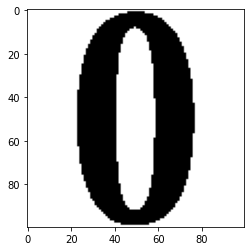

In [314]:
img = myImg('/content/zero.jpg')
im1 = img.get()
print(im1.shape)

(10000, 1)


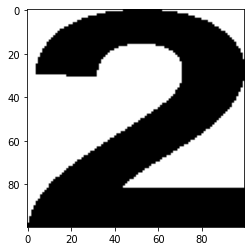

In [315]:
img2 = myImg('/content/2png.png')
im2 = img2.get()
print(im2.shape)
# img2.show()

(10000, 1)


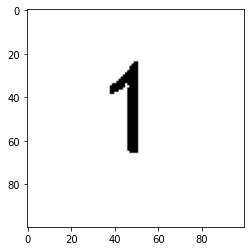

In [316]:
img3 = myImg('/content/Number-One.jpg')
im3 = img3.get()
print(im3.shape)

In [317]:
x = np.concatenate((im1,im2,im3),axis=1)
HOP = HOP(x)

It took 474 Iterations !


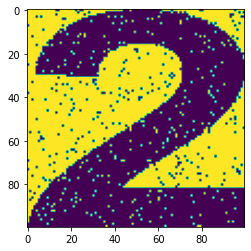

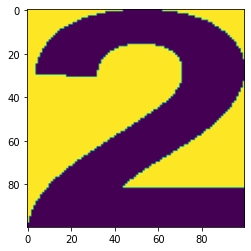

In [318]:
noisy = noise(im2,5)
show_hop(noisy)
o = HOP.predict(noisy)
show_hop(o)